# Trabalho de Inteligência Artificial I



### __Prof:__ Hitoshi Nagano, Ph.D. 

### __Aluno:__ João Roberto Perin

#### Material de apoio:  

[Pandas Dataframe by Example](http://queirozf.com/entries/pandas-dataframe-by-example)

##  
  
## Instruções:

1) __Baixar os datasets em:__  https://www.kaggle.com/c/home-credit-default-risk/data

2) __Explorar conforme instruções:__  

 * __application_train.csv:__ Esse csv possui 122 colunas: explorar 40 colunas sendo as primeiras 30 obrigatórias e 10 adicionais a escolher.  
 
 * 30 colunas obrigatórias:  

>  SK_ID_CURR  
>  TARGET  
>  NAME_CONTRACT_TYPE  
>  CODE_GENDER  
>  FLAG_OWN_CAR  
>  FLAG_OWN_REALTY  
>  CNT_CHILDREN  
>  AMT_INCOME_TOTAL  
>  AMT_CREDIT  
>  AMT_ANNUITY  
>  AMT_GOODS_PRICE  
>  NAME_TYPE_SUITE  
>  NAME_INCOME_TYPE  
>  NAME_EDUCATION_TYPE  
>  NAME_FAMILY_STATUS  
>  NAME_HOUSING_TYPE  
>  REGION_POPULATION_RELATIVE  
>  DAYS_BIRTH  
>  DAYS_EMPLOYED  
>  DAYS_REGISTRATION  
>  DAYS_ID_PUBLISH  
>  OWN_CAR_AGE  
>  FLAG_MOBIL  
>  FLAG_EMP_PHONE  
>  FLAG_WORK_PHONE  
>  FLAG_CONT_MOBILE  
>  FLAG_PHONE  
>  FLAG_EMAIL   
>  OCCUPATION_TYPE  
>  CNT_FAM_MEMBERS  
       
 * alunos deverão se organizar para que todas as colunas sejam exploradas
 * escolher dois arquivos, para exploração e join/merge/concat com o 'application_train.csv'
 
>  HomeCredit_columns_description.csv  
>  POS_CASH_balance.csv  
>  credit_card_balance.csv  
>  installments_payments.csv  
>  application_train.csv  
>  bureau.csv  
>  previous_application.csv  
>  bureau_balance.csv  
>  sample_submission.csv  

3) __objetivos:__
* entendimento do problema de negócio
* carregamento do dataset
* identificação e tratamento de NaN
* exploração univariada, bivariada
* visualizações
* insights de negócio
* formatação do dataset para algoritmos de machine learning
* criação de features: agregação de dados, junção de dois ou mais dataframes

4) __entregável:__ jupyter notebook. Não será necessário apresentação em powerpoint, nem relatório.

5) __entrega limite:__ 8/agosto/2018 

6) __trabalho individual.__ Haverá aplicação sistema anti-plágio nas submissões. (http://www.fgv.br/mailing/codigo-etica-conduta/24/)
   suspeitas de plágio estarão sujeitos a arguição oral de 5 mins por aluno no ultimo dia de aula (11/agosto/2018),

7) __avaliação:__
* jupyter notebook e arguição (se houver)

# Definição dos dados de trabalho

## Configurações

In [1]:
import pandas as pd

semente = 2306 # <-- Data de aniversário


df = pd.read_csv('./data/application_train.csv')

# Pegando as 30 colunas obrigatórias
df30 = df.iloc[:,0:30]

# Pegando colunas a partir da 31 (30 pq é indice 0) para sorteio
df_temp=df.iloc[:,30:]

# Sorteio de 10 colunas com a semente Data Aniversario
df10 = df_temp.sample(10,axis=1,random_state=semente)

# Juntar todas as colunas 30 obrigatorias + 10 do sorteio
df40 = pd.concat([df30, df10], axis=1)

# Imprimir o resultado:
i = 1
for x in df40.columns:
    print(str(i) + " - " + x)
    i += 1

1 - SK_ID_CURR
2 - TARGET
3 - NAME_CONTRACT_TYPE
4 - CODE_GENDER
5 - FLAG_OWN_CAR
6 - FLAG_OWN_REALTY
7 - CNT_CHILDREN
8 - AMT_INCOME_TOTAL
9 - AMT_CREDIT
10 - AMT_ANNUITY
11 - AMT_GOODS_PRICE
12 - NAME_TYPE_SUITE
13 - NAME_INCOME_TYPE
14 - NAME_EDUCATION_TYPE
15 - NAME_FAMILY_STATUS
16 - NAME_HOUSING_TYPE
17 - REGION_POPULATION_RELATIVE
18 - DAYS_BIRTH
19 - DAYS_EMPLOYED
20 - DAYS_REGISTRATION
21 - DAYS_ID_PUBLISH
22 - OWN_CAR_AGE
23 - FLAG_MOBIL
24 - FLAG_EMP_PHONE
25 - FLAG_WORK_PHONE
26 - FLAG_CONT_MOBILE
27 - FLAG_PHONE
28 - FLAG_EMAIL
29 - OCCUPATION_TYPE
30 - CNT_FAM_MEMBERS
31 - DEF_30_CNT_SOCIAL_CIRCLE
32 - FLAG_DOCUMENT_8
33 - FLAG_DOCUMENT_3
34 - FLAG_DOCUMENT_15
35 - LIVINGAREA_MEDI
36 - EMERGENCYSTATE_MODE
37 - REGION_RATING_CLIENT_W_CITY
38 - FLOORSMIN_AVG
39 - FLAG_DOCUMENT_19
40 - ORGANIZATION_TYPE


In [2]:
import numpy  as np
import pandas as pd
import seaborn as sns

pd.set_option('display.precision', 2)
pd.set_eng_float_format(accuracy=3, use_eng_prefix=True)

import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
%matplotlib inline


# Machine Learn
#-------------------------------------------

# Transforma os dados em categoricos
from sklearn.preprocessing import LabelEncoder

# Classifica os dados
from sklearn.ensemble import RandomForestClassifier

# Valida o resultado do modelo
from sklearn.metrics import accuracy_score

# Faz a divisão entre Treino e Teste
from sklearn.model_selection import train_test_split


plot_style = 'seaborn'
#style_list = ['default', 'classic'] + sorted(style for style in plt.style.available if style != 'classic')
#style_list

/home/jrperin/.pyenv/versions/3.7.0/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Carga dos Dados

In [3]:
df = df40.copy(deep=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 40 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [5]:
# Configurando o índice
df.set_index('SK_ID_CURR');

In [6]:
df.shape

(307511, 40)

# Separando as colunas por tipo de tratamento

In [7]:
# Colunas Categóricas:
categoricas = df.select_dtypes(exclude=['int', 'float']).columns

In [8]:
# Colunas Não Categóricas
nao_categoricas = df.select_dtypes(exclude=['object']).columns

In [9]:
# Colunas com Missing Values
missing = df.columns[df.isnull().any()]

In [10]:
# Colunas sem Missing Values
nao_missing = df.columns[~df.isnull().any()]

### - Colunas categóricas

In [11]:
categoricas

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'EMERGENCYSTATE_MODE', 'ORGANIZATION_TYPE'],
      dtype='object')

### - Colunas não categóricas

In [12]:
nao_categoricas

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_15',
       'LIVINGAREA_MEDI', 'REGION_RATING_CLIENT_W_CITY', 'FLOORSMIN_AVG',
       'FLAG_DOCUMENT_19'],
      dtype='object')

### - Colunas sem missing values

In [13]:
nao_missing

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_15', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_19',
       'ORGANIZATION_TYPE'],
      dtype='object')

### - Colunas com missing values

In [14]:
missing

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'LIVINGAREA_MEDI', 'EMERGENCYSTATE_MODE', 'FLOORSMIN_AVG'],
      dtype='object')

# Análise Univariada dos Dados

## Variáveis Categóricas

In [15]:
# Explorando as variáveis categóricas:

for x in df[categoricas]:
    line = 50 * '-'
    print (x)
    print (line)
    print (df[x].value_counts( dropna=False ))
    print (line)
    print ()    

NAME_CONTRACT_TYPE
--------------------------------------------------
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
--------------------------------------------------

CODE_GENDER
--------------------------------------------------
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
--------------------------------------------------

FLAG_OWN_CAR
--------------------------------------------------
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
--------------------------------------------------

FLAG_OWN_REALTY
--------------------------------------------------
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
--------------------------------------------------

NAME_TYPE_SUITE
--------------------------------------------------
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               8

## Variáveis Não Categóricas

In [16]:
for x in df[nao_categoricas[2:]]:
    line = 50 * '-'
    print (x)
    print (line)
    print(df[x].describe())
    print (line)
    print ()

CNT_CHILDREN
--------------------------------------------------
count    307.511k
mean     417.052m
std      722.121m
min         0.000
25%         0.000
50%         0.000
75%         1.000
max        19.000
Name: CNT_CHILDREN, dtype: float64
--------------------------------------------------

AMT_INCOME_TOTAL
--------------------------------------------------
count    307.511k
mean     168.798k
std      237.123k
min       25.650k
25%      112.500k
50%      147.150k
75%      202.500k
max      117.000M
Name: AMT_INCOME_TOTAL, dtype: float64
--------------------------------------------------

AMT_CREDIT
--------------------------------------------------
count    307.511k
mean     599.026k
std      402.491k
min       45.000k
25%      270.000k
50%      513.531k
75%      808.650k
max        4.050M
Name: AMT_CREDIT, dtype: float64
--------------------------------------------------

AMT_ANNUITY
--------------------------------------------------
count    307.499k
mean      27.109k
std       14

## Pela análise, vemos que tem algumas variáveis que poderiam ser Categóricas:

FLAG_MOBIL  
FLAG_EMP_PHONE  
FLAG_WORK_PHONE  
FLAG_CONT_MOBILE  
FLAG_PHONE  
FLAG_EMAIL  
FLAG_DOCUMENT_8  
FLAG_DOCUMENT_3  
FLAG_DOCUMENT_15  
FLAG_DOCUMENT_19  

In [17]:
# Vou convertê-las em Variáveis Categóricas:
to_convert = [
    'FLAG_MOBIL',
    'FLAG_EMP_PHONE', 
    'FLAG_WORK_PHONE', 
    'FLAG_CONT_MOBILE',
    'FLAG_PHONE',
    'FLAG_EMAIL',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_19',
]

In [18]:
# Convertendo os 1/0 em Y/N:

# Pega todas as linhas que estão nas colunas "to_convert"
#bkp = df.loc[ : , to_convert]

for x in to_convert:
    df[x] = df[x].replace({0 : 'N', 1: 'Y'}, inplace=False)
    df[x] = df[x].astype(object)

In [19]:
for x in to_convert:
    print (40 * "-")
    print (df[x].value_counts())

----------------------------------------
Y    307510
N         1
Name: FLAG_MOBIL, dtype: int64
----------------------------------------
Y    252125
N     55386
Name: FLAG_EMP_PHONE, dtype: int64
----------------------------------------
N    246203
Y     61308
Name: FLAG_WORK_PHONE, dtype: int64
----------------------------------------
Y    306937
N       574
Name: FLAG_CONT_MOBILE, dtype: int64
----------------------------------------
N    221080
Y     86431
Name: FLAG_PHONE, dtype: int64
----------------------------------------
N    290069
Y     17442
Name: FLAG_EMAIL, dtype: int64
----------------------------------------
N    282487
Y     25024
Name: FLAG_DOCUMENT_8, dtype: int64
----------------------------------------
Y    218340
N     89171
Name: FLAG_DOCUMENT_3, dtype: int64
----------------------------------------
N    307139
Y       372
Name: FLAG_DOCUMENT_15, dtype: int64
----------------------------------------
N    307328
Y       183
Name: FLAG_DOCUMENT_19, dtype: int64


In [20]:
df[to_convert].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 10 columns):
FLAG_MOBIL          307511 non-null object
FLAG_EMP_PHONE      307511 non-null object
FLAG_WORK_PHONE     307511 non-null object
FLAG_CONT_MOBILE    307511 non-null object
FLAG_PHONE          307511 non-null object
FLAG_EMAIL          307511 non-null object
FLAG_DOCUMENT_8     307511 non-null object
FLAG_DOCUMENT_3     307511 non-null object
FLAG_DOCUMENT_15    307511 non-null object
FLAG_DOCUMENT_19    307511 non-null object
dtypes: object(10)
memory usage: 23.5+ MB


# Analisando Missing Values - NaN

In [21]:
nulls_sum = df[missing].isnull().sum().sort_values()

In [22]:
nulls_sum

CNT_FAM_MEMBERS                  2
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
DEF_30_CNT_SOCIAL_CIRCLE      1021
NAME_TYPE_SUITE               1292
OCCUPATION_TYPE              96391
EMERGENCYSTATE_MODE         145755
LIVINGAREA_MEDI             154350
OWN_CAR_AGE                 202929
FLOORSMIN_AVG               208642
dtype: int64

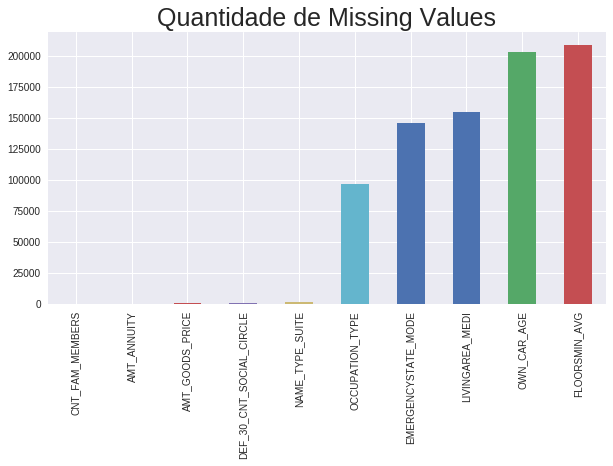

In [23]:
with plt.style.context(plot_style):
    plt.figure()
    plt.title("Quantidade de Missing Values", fontsize = 25)
    nulls_sum.plot(kind = 'bar',    figsize = (10,5), )
    plt.show()


### Representatividade dos Missing Values nas amostras

In [24]:
total_dados = df[missing].shape[0]
total_dados

307511

In [25]:

for col, value in nulls_sum.items():
    str1 = (col + 30 * ' ')[:25]
    str2 = (7 * ' ' + str(value))[-7:]
    str3 = (7 * ' ' + str(format(round(value / total_dados * 100, 2), '.2f')) + '%')[-7:]
    print (str1 + ' -> ' + str2 + ' = ' + str3)

CNT_FAM_MEMBERS           ->       2 =   0.00%
AMT_ANNUITY               ->      12 =   0.00%
AMT_GOODS_PRICE           ->     278 =   0.09%
DEF_30_CNT_SOCIAL_CIRCLE  ->    1021 =   0.33%
NAME_TYPE_SUITE           ->    1292 =   0.42%
OCCUPATION_TYPE           ->   96391 =  31.35%
EMERGENCYSTATE_MODE       ->  145755 =  47.40%
LIVINGAREA_MEDI           ->  154350 =  50.19%
OWN_CAR_AGE               ->  202929 =  65.99%
FLOORSMIN_AVG             ->  208642 =  67.85%


**Vemos que para algumas variáveis os Missing Values possuem pouca representatividade**
```
CNT_FAM_MEMBERS           ->       2 =   0.00%
AMT_ANNUITY               ->      12 =   0.00%
AMT_GOODS_PRICE           ->     278 =   0.09%
DEF_30_CNT_SOCIAL_CIRCLE  ->    1021 =   0.33%
NAME_TYPE_SUITE           ->    1292 =   0.42%
```

**E para outras a sua representatividade sobre o Total é elevada**

```
OCCUPATION_TYPE           ->   96391 =  31.35%
EMERGENCYSTATE_MODE       ->  145755 =  47.40%
LIVINGAREA_MEDI           ->  154350 =  50.19%
OWN_CAR_AGE               ->  202929 =  65.99%
FLOORSMIN_AVG             ->  208642 =  67.85%
```

**Para as primeiras variáveis que possuem menos de 1% de Missing Values vou excluí-los da amostra**

**Para as demais vou tratá-los de outra forma**

In [26]:
nan_excluir = [
    'CNT_FAM_MEMBERS',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'NAME_TYPE_SUITE',
]

In [27]:
nan_excluir

['CNT_FAM_MEMBERS',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE']

In [28]:
nan_tratar =[
    'OCCUPATION_TYPE',
    'EMERGENCYSTATE_MODE',
    'LIVINGAREA_MEDI',
    'OWN_CAR_AGE',   
    'FLOORSMIN_AVG',
]

In [29]:
nan_tratar

['OCCUPATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'LIVINGAREA_MEDI',
 'OWN_CAR_AGE',
 'FLOORSMIN_AVG']

## Tratamento Missing Values - Exclusão

In [30]:
df.dropna(subset = nan_excluir, inplace = True)

In [31]:
df[nan_excluir].isnull().sum().sort_values()

CNT_FAM_MEMBERS             0
AMT_ANNUITY                 0
AMT_GOODS_PRICE             0
DEF_30_CNT_SOCIAL_CIRCLE    0
NAME_TYPE_SUITE             0
dtype: int64

## Tratamento Missing Values - Alteração

#### OCCUPATION_TYPE (Tipo Categórico)

In [32]:
df['OCCUPATION_TYPE'].value_counts(dropna = False).sort_values()

IT staff                   512
HR staff                   558
Realty agents              744
Secretaries               1294
Waiters/barmen staff      1338
Low-skill Laborers        2083
Private service staff     2632
Cleaning staff            4624
Cooking staff             5912
Security staff            6679
Medicine staff            8483
Accountants               9722
High skill tech staff    11279
Drivers                  18484
Managers                 21139
Core staff               27314
Sales staff              31876
Laborers                 54832
NaN                      95681
Name: OCCUPATION_TYPE, dtype: int64

**Vou considerar os NaNs como não informado e mantê-los 'XNA'**

In [33]:
df['OCCUPATION_TYPE'].fillna('XNA', inplace=True)

In [34]:
df['OCCUPATION_TYPE'].value_counts(dropna = False).sort_values()

IT staff                   512
HR staff                   558
Realty agents              744
Secretaries               1294
Waiters/barmen staff      1338
Low-skill Laborers        2083
Private service staff     2632
Cleaning staff            4624
Cooking staff             5912
Security staff            6679
Medicine staff            8483
Accountants               9722
High skill tech staff    11279
Drivers                  18484
Managers                 21139
Core staff               27314
Sales staff              31876
Laborers                 54832
XNA                      95681
Name: OCCUPATION_TYPE, dtype: int64

#### EMERGENCYSTATE_MODE (Tipo Categórico)

In [35]:
df['EMERGENCYSTATE_MODE'].value_counts(dropna = False).sort_values()

Yes      2317
NaN    144816
No     158053
Name: EMERGENCYSTATE_MODE, dtype: int64

**Como a quantidade de NaN é muito alta, também vou considerá-la como não informado 'XNA'**

In [36]:
df['EMERGENCYSTATE_MODE'].fillna('XNA', inplace=True)

In [37]:
df['EMERGENCYSTATE_MODE'].value_counts(dropna = False).sort_values()

Yes      2317
XNA    144816
No     158053
Name: EMERGENCYSTATE_MODE, dtype: int64

## Tratamentos dos Missing Values - NÃO CATEGÓRICOS

#### LIVINGAREA_MEDI (Tipo Não Categórico)

In [38]:
df['LIVINGAREA_MEDI'].value_counts(dropna = False).sort_values().head(10)

438.400m    1
265.000m    1
481.200m    1
642.400m    1
371.400m    1
450.700m    1
670.800m    1
476.700m    1
627.800m    1
278.700m    1
Name: LIVINGAREA_MEDI, dtype: int64

**Vou colocar a área = -1 para identificar que trata-se de um valor não informado**  
**A quantidade de NaN na amostra é muito elevada para considerar pela média ou pelos vizinhos**

In [39]:
df['LIVINGAREA_MEDI'] = df['LIVINGAREA_MEDI'].apply(lambda x: round(x, 4) if pd.notna(x) else -1 )

In [40]:
df['LIVINGAREA_MEDI'].describe()

count    305.186k
mean    -448.488m
std      559.850m
min        -1.000
25%        -1.000
50%        -1.000
75%       74.400m
max         1.000
Name: LIVINGAREA_MEDI, dtype: float64

#### OWN_CAR_AGE (Tipo Não Categórico)

In [41]:
df['OWN_CAR_AGE'].value_counts(dropna = False).sort_values().head(10)


50.000    1
48.000    1
69.000    1
56.000    1
47.000    1
52.000    1
57.000    1
63.000    2
91.000    2
51.000    3
Name: OWN_CAR_AGE, dtype: int64

In [42]:
df['OWN_CAR_AGE'] = df['LIVINGAREA_MEDI'].apply(lambda x: round(x, 4) if pd.notna(x) else -1 )

In [43]:
df['OWN_CAR_AGE'].describe()

count    305.186k
mean    -448.488m
std      559.850m
min        -1.000
25%        -1.000
50%        -1.000
75%       74.400m
max         1.000
Name: OWN_CAR_AGE, dtype: float64

#### FLOORSMIN_AVG (Tipo Não Categórico)

In [44]:
df['FLOORSMIN_AVG'].value_counts(dropna = False).sort_values().head(10)

572.900m    1
13.800m     1
847.100m    1
203.300m    1
633.300m    1
170.800m    1
100.000m    1
47.900m     1
600.000m    1
317.500m    1
Name: FLOORSMIN_AVG, dtype: int64

In [45]:
df['FLOORSMIN_AVG'] = df['LIVINGAREA_MEDI'].apply(lambda x: round(x, 4) if pd.notna(x) else -1 )

In [46]:
df['FLOORSMIN_AVG'].describe()

count    305.186k
mean    -448.488m
std      559.850m
min        -1.000
25%        -1.000
50%        -1.000
75%       74.400m
max         1.000
Name: FLOORSMIN_AVG, dtype: float64

## Resultado do tratamento dos Missing Values (NaN)

In [47]:
df[missing].isnull().sum().sort_values()

AMT_ANNUITY                 0
AMT_GOODS_PRICE             0
NAME_TYPE_SUITE             0
OWN_CAR_AGE                 0
OCCUPATION_TYPE             0
CNT_FAM_MEMBERS             0
DEF_30_CNT_SOCIAL_CIRCLE    0
LIVINGAREA_MEDI             0
EMERGENCYSTATE_MODE         0
FLOORSMIN_AVG               0
dtype: int64

# Refresh da Separação das Colunas


## Atualizar porque algumas colunas foram convertidas em categóricas

In [48]:
# Colunas Categóricas:
categoricas = df.select_dtypes(exclude=['int', 'float']).columns

In [49]:
# Colunas Não Categóricas
nao_categoricas = df.select_dtypes(exclude=['object']).columns

# Gráficos

## Não Categóricas

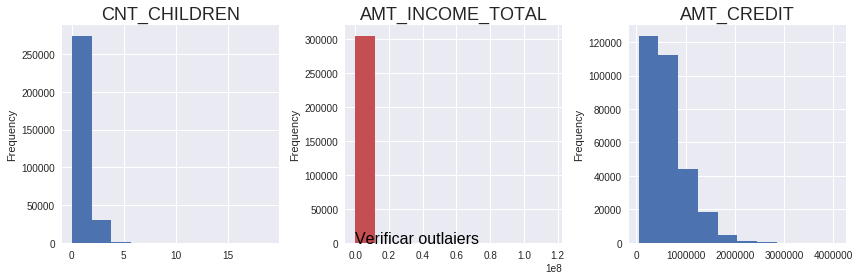

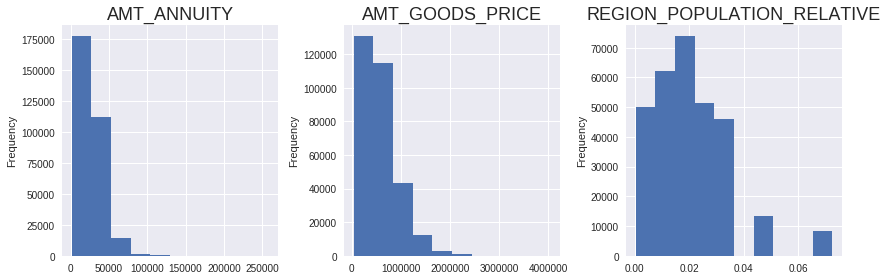

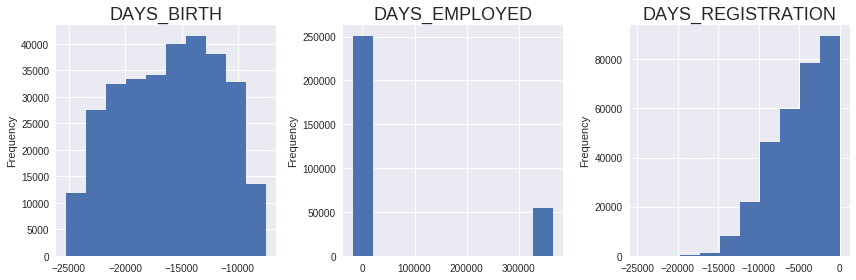

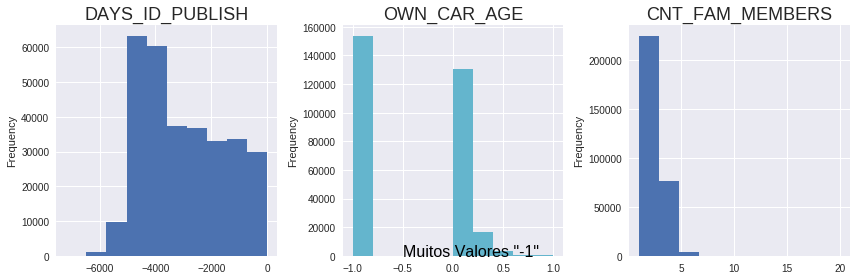

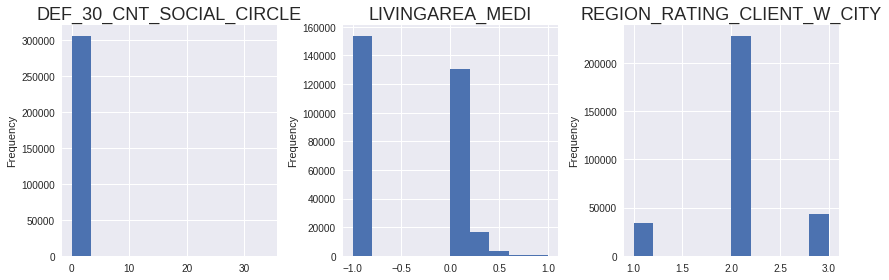

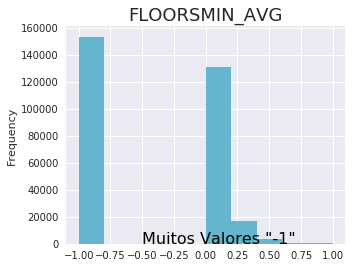

In [50]:
# Não vou plotar as 2 primeiras colunas - Índice e o Target

side = 0
limit = 3

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

with plt.style.context(plot_style):
    
    for x in nao_categoricas[2:]:
        side += 1
        fsize = (12.0, 4.0)
        
        plt.subplots_adjust(left=-0.2)
        plt.subplot(1, limit, side)

        plt.title(x, fontsize = 18)
        #barcolor = 'steelblue'
        barcolor = '#4C72B0'
        
        # Inserindo anotações nos gráficos:
        if x in ['OWN_CAR_AGE', 'LIVING_AREA_MEDI', 'FLOORSMIN_AVG']:
            #barcolor = 'turquoise'
            barcolor = '#64B5CD'
            plt.text(-0.5, 0, 'Muitos Valores "-1"', fontdict=font)
            
        if x == 'AMT_INCOME_TOTAL':
            #barcolor = 'lightcoral'
            barcolor = '#C44E52'
            plt.text(0, 0, 'Verificar outlaiers', fontdict=font)

        # Plotando o gráfico
        df[x].sort_index().plot(kind = 'hist', figsize = fsize, facecolor=barcolor)
        
        if side == limit:
            side = 0
            plt.tight_layout()
            plt.show()



## Categóricas

In [51]:
# Separando as variáveis por tamanho do gráfico a ser impresso
grafP = categoricas.drop(['OCCUPATION_TYPE','ORGANIZATION_TYPE'])
grafG = ['OCCUPATION_TYPE','ORGANIZATION_TYPE']

In [52]:
# Rotina para imprimir os gráficos
def imprime_categoricas(limit, colunas):
    side = 0

    font = {'family': 'sans-serif',
            'color':  'black',
            'weight': 'normal',
            'size': 16,
            }

    with plt.style.context(plot_style):
        for x in colunas:
            side += 1
            fsize = (15.0, 7.0)

            plt.subplots_adjust(left=-0.2)
            plt.subplot(1, limit, side)

            plt.title(x, fontsize = 18)
            plt.xticks(fontsize=12, rotation=90)

            if x in ['OCCUPATION_TYPE','ORGANIZATION_TYPE']:
                plt.subplot(1, 1, 1)
    #            fsize = (14.0, 7.0)

            df[x].value_counts().sort_index().plot(kind = 'bar', figsize = fsize)

            if side == limit:
                side = 0
                plt.tight_layout()
                plt.show()

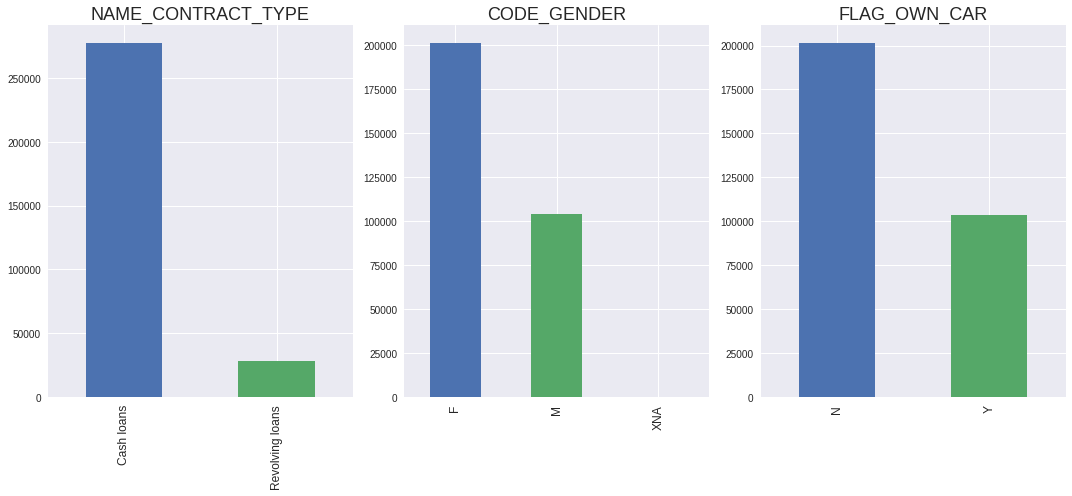

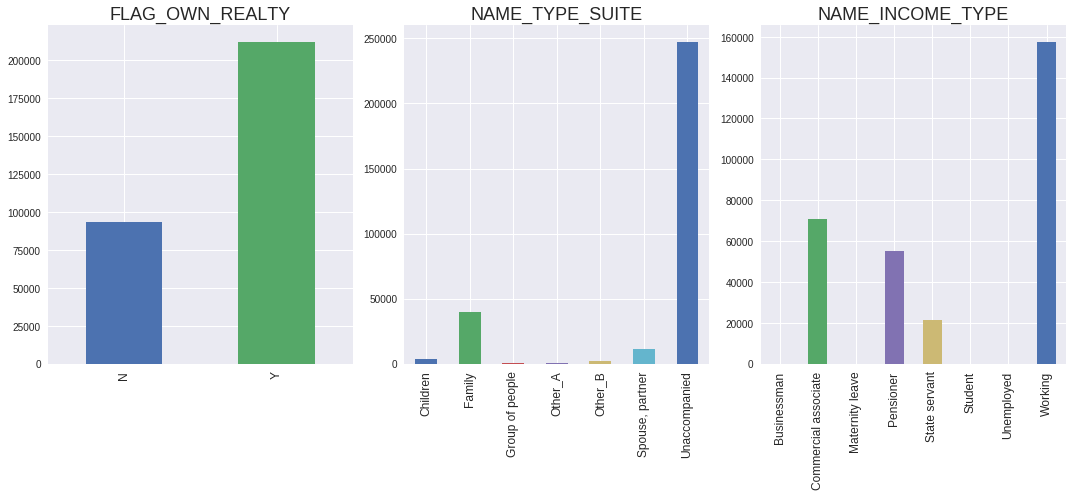

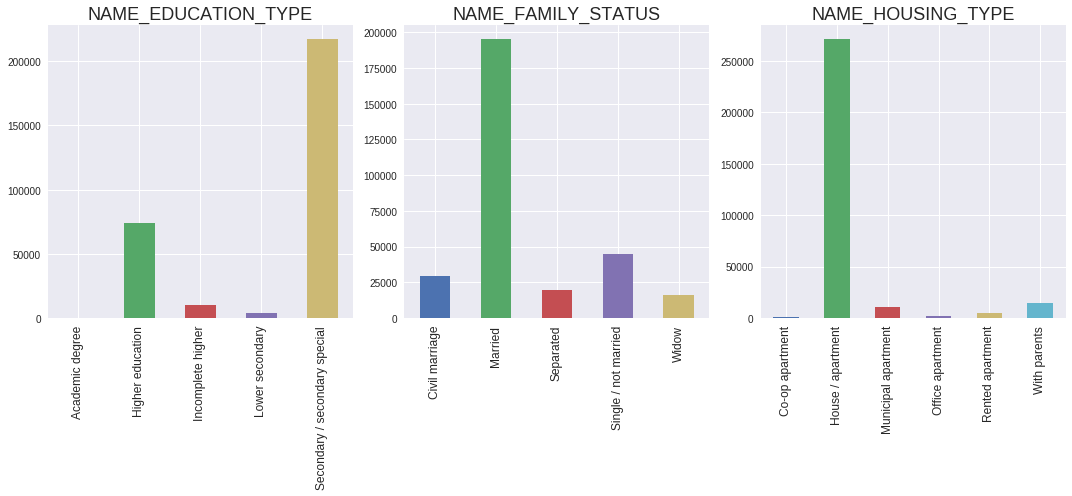

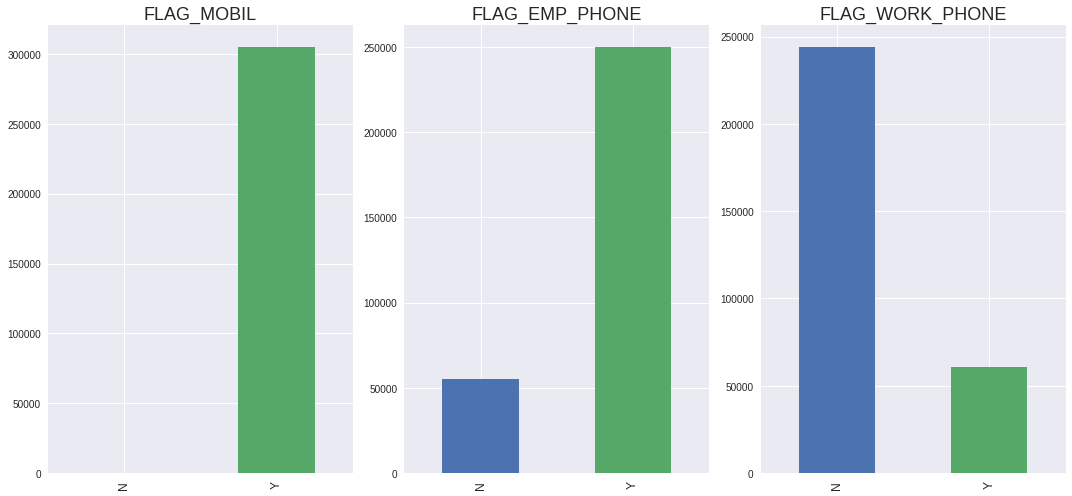

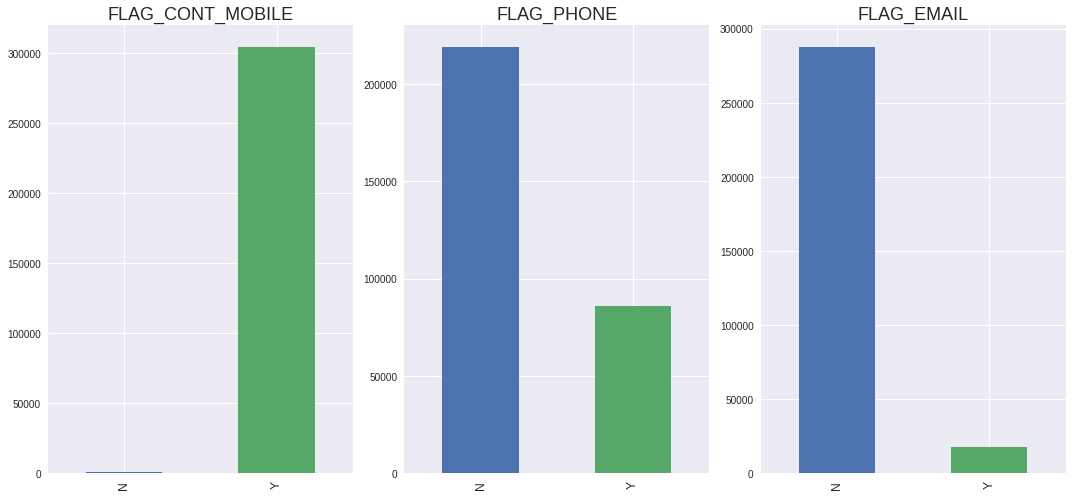

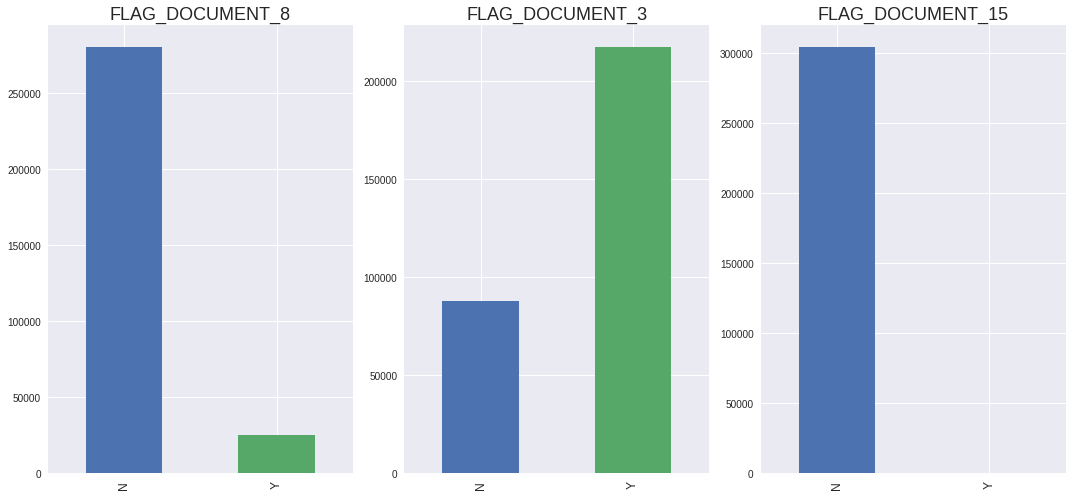

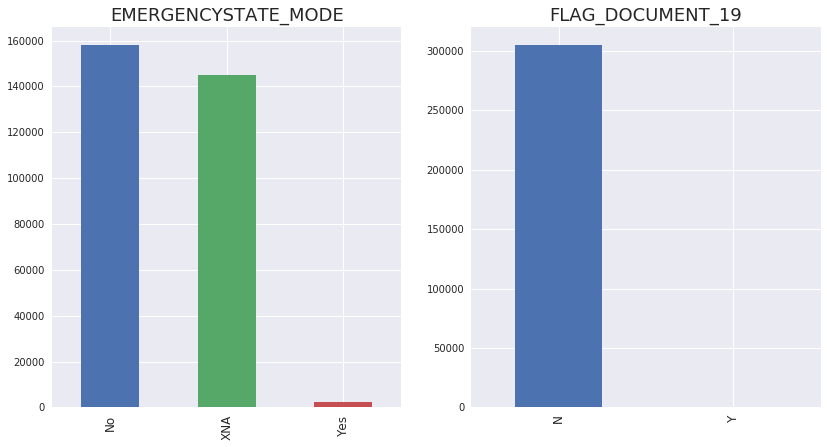

In [53]:
imprime_categoricas(3, grafP)

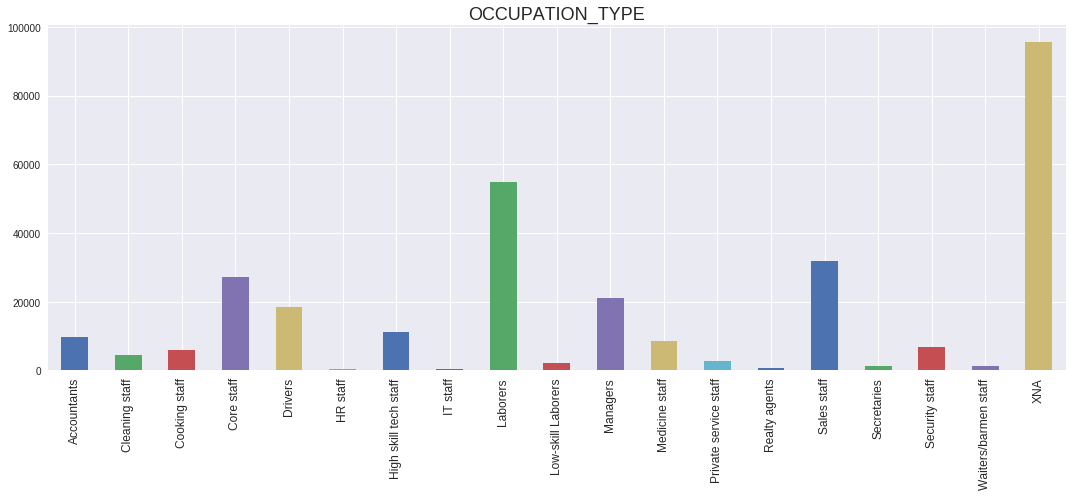

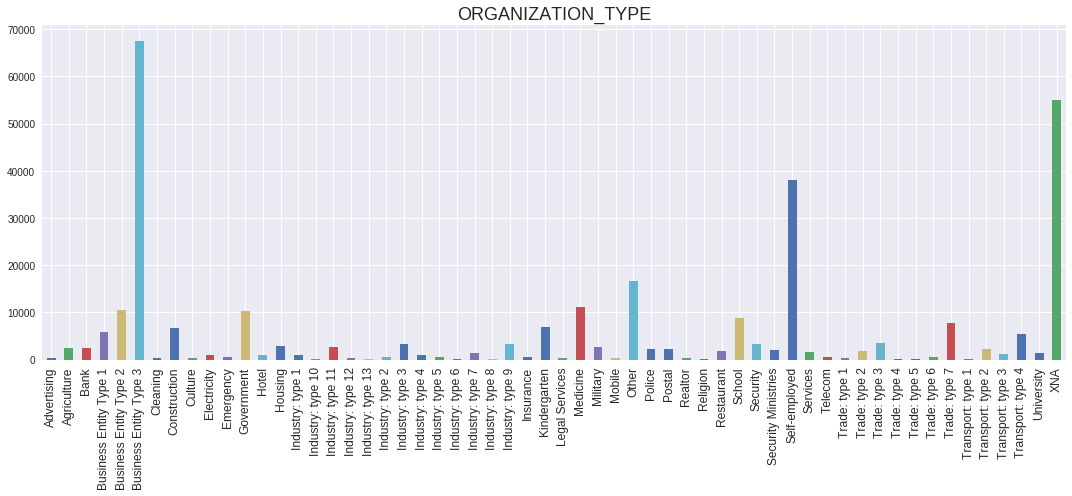

In [54]:
imprime_categoricas(1, grafG)

**OBS.: EMERGENCYSTATE_MODE** está com domínios Yes / No, vou trocar para Y/N para padronizar com os outros

In [55]:
df['EMERGENCYSTATE_MODE'].replace({'Yes' : 'Y', 'No': 'N'}, inplace=True)

In [56]:
df['EMERGENCYSTATE_MODE'].value_counts()

N      158053
XNA    144816
Y        2317
Name: EMERGENCYSTATE_MODE, dtype: int64

# Análise Bivariada

## Correlação Numérica

In [57]:
all_corr = df[nao_categoricas[1:]].corr()

In [58]:
all_corr = all_corr.apply(lambda x: round(x, 10))


In [59]:
nao_categoricas[1:].value_counts().sum()

17

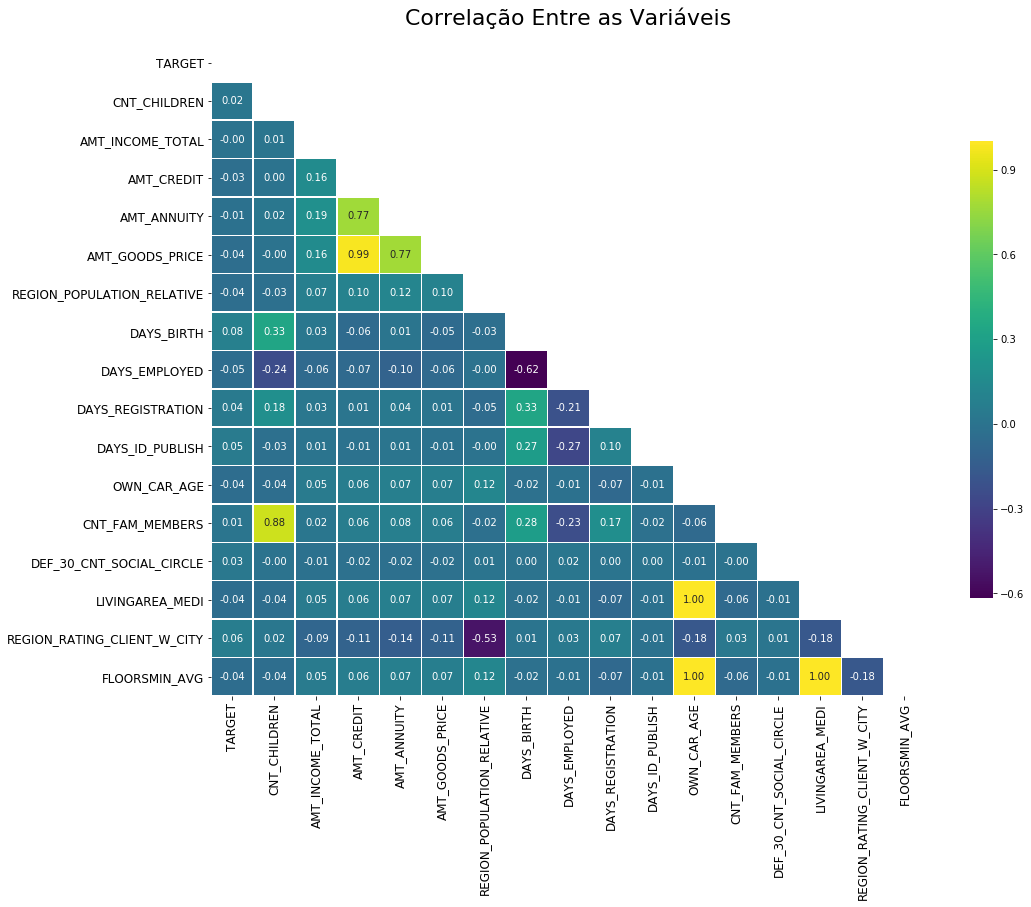

In [60]:
# Define the plot
fig, ax = plt.subplots(figsize=(16,12))

# Add title to the Head Map
title = "Correlação Entre as Variáveis"

# Set the font size and the distance of the title from the plot
plt.title(title, fontsize=22)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)

ax.title.set_position([0.5, 1.02])

# Generate a mask for the upper triangle
mask = np.zeros_like(all_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(all_corr, annot=True, fmt='.2f', mask=mask, cmap='viridis', linewidths=0.5, ax=ax, cbar_kws={"shrink": .7} )
plt.show()

# Cores:
# - cmap='viridis'
# - cmap='RdYlGn'
# - robust=True

## Insigths sobre a correlação:
  
  
* As variáveis **FLOORSMIN_AVG X OWN_CAR_AGE**, **FLOORSMIN_AVG X LIVINGAREA_MEDI** e **LIVINGAREA_MEDI X OWN_CAR_AGE** possuem Covariância muito elevada = 1.00.
> Todas são variáveis que estavam com elevado valor de NaN e foram tratadas.  
> Verificar se o modelo melhora ao retirá-las.  
  
* **AMT_GOODS_PRICE X AMT_CREDIT X AMT_ANNUITY** quanto maior o valor dos bens que o cliente possui, maior o valor do empréstimo a ser dado e o AMT_ANNUITY deve compor o valor do empréstimo.  
  
  
* **CNT_FAM_MEMBERS X CNT_CHILDREN** possuem correlação elevada, mas a variável CNT_CHILDREN (Quantidade de filhos) compõe a variável CNT_FAM_MEMBERS (Quantidade de familiares)
  
  
* Existe forte correlação negativa entre **REGION_RATING_CLIENT_W_CITY X REGION_POPULATION_RELATIVE**
 
 
* Também existe forte correlação negativa entre **DAYS_BIRTH X DAYS_EMPLOYED** 
  

## Categórica

In [124]:
# Fazer o cruzamento das variáveis categóricas 2 a 2
catx  = categoricas
caty  = categoricas
cross = dict()


In [99]:
#for x in catx:
#    for y in caty:
#        if x < y:
#            crossX = pd.crosstab(df[x], df[y])
#            cross[x + ' X ' + y] = crossX

In [125]:
#y = 1
for x in categoricas:
    crossX = pd.crosstab(df['TARGET'], df[x])
    cross[x] = crossX
    #y +=1

In [126]:
for key, value in cross.items():
    #print(key)
    print(80 * '-')
    print(value)
    print()
    print()
    print()

--------------------------------------------------------------------------------
NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                       254039            26428
1                        23173             1546



--------------------------------------------------------------------------------
CODE_GENDER       F      M  XNA
TARGET                         
0            186878  93585    4
1             14102  10617    0



--------------------------------------------------------------------------------
FLAG_OWN_CAR       N      Y
TARGET                     
0             184207  96260
1              17172   7547



--------------------------------------------------------------------------------
FLAG_OWN_REALTY      N       Y
TARGET                        
0                85286  195181
1                 7798   16921



--------------------------------------------------------------------------------
NAME_TYPE_SUITE  Children  

In [128]:
# Rotina para imprimir os gráficos
def heatmap_categoricas(limit, cross):
    side = 0

    font = {'family': 'sans-serif',
            'color':  'black',
            'weight': 'normal',
            'size': 16,
            }

    with plt.style.context(plot_style):
        for key, value in cross.items():
            side += 1
            fsize = (15.0, 7.0)

            plt.subplots_adjust(left=-0.2)
            plt.subplot(1, limit, side)

            plt.title(key, fontsize = 10)
            plt.xticks(fontsize=12, rotation=90)

   
            #df[x].value_counts().sort_index().plot(kind = 'bar', figsize = fsize)
            sns.heatmap(value, annot=True, fmt='d', cmap="YlGnBu", linewidths=0.03, ax=ax, )

            if side == limit:
                side = 0
                plt.tight_layout()
                plt.show()

In [117]:
#heatmap_categoricas(1, cross)

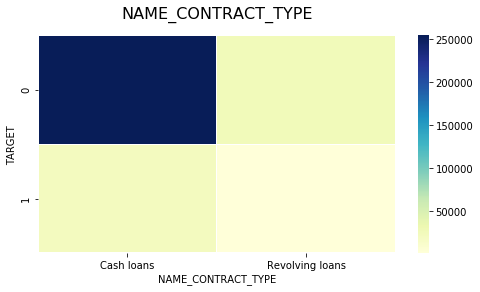

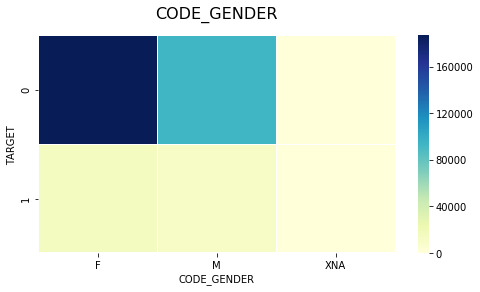

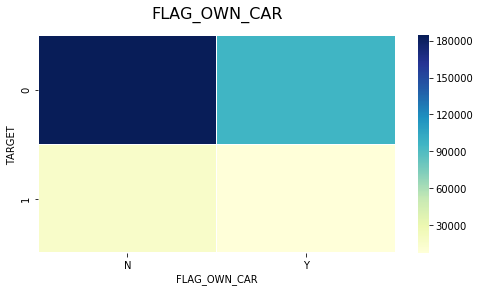

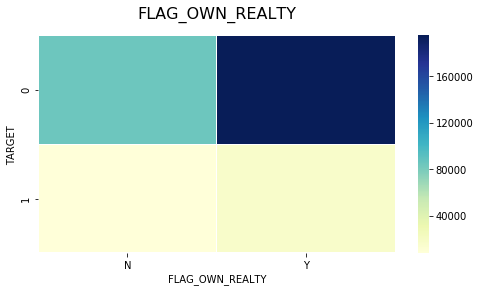

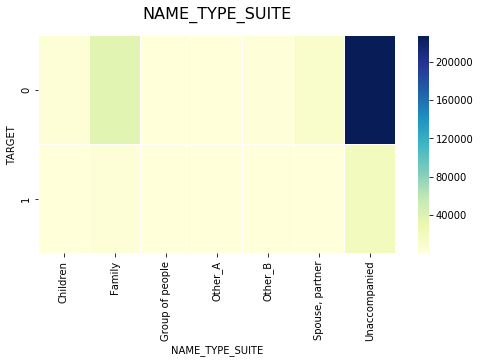

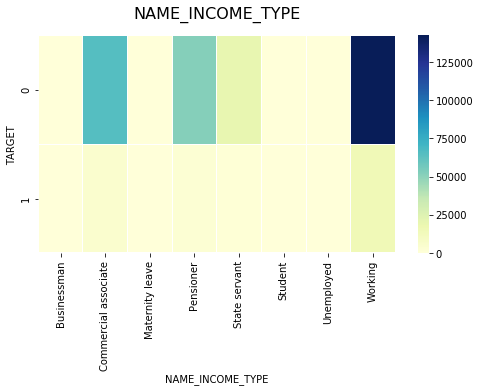

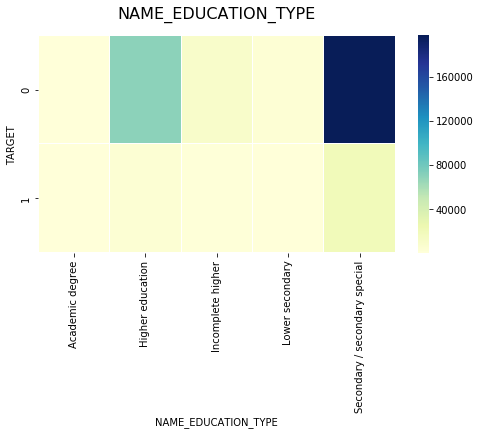

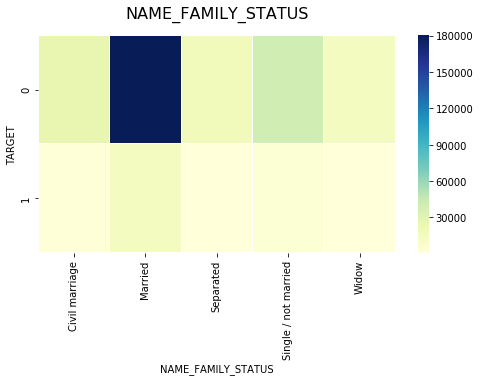

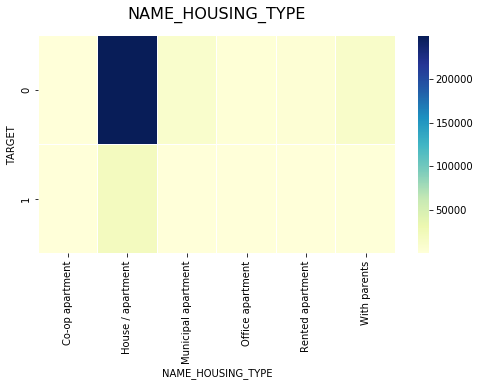

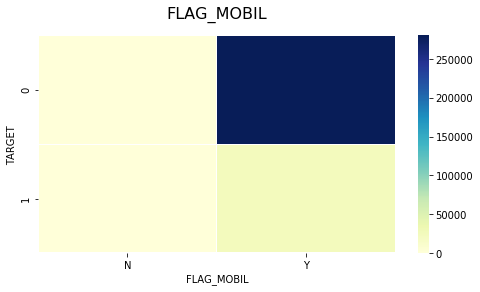

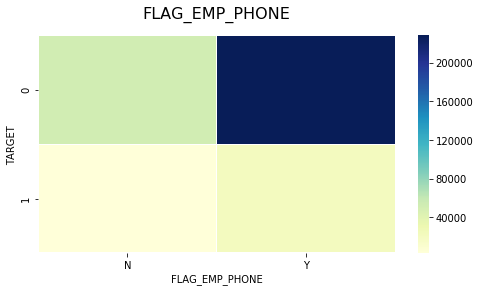

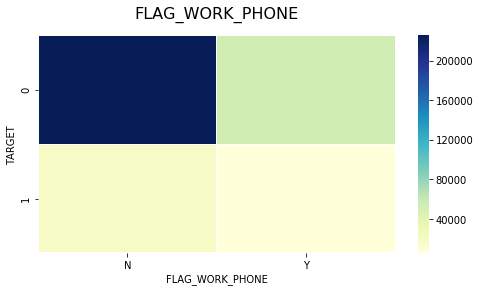

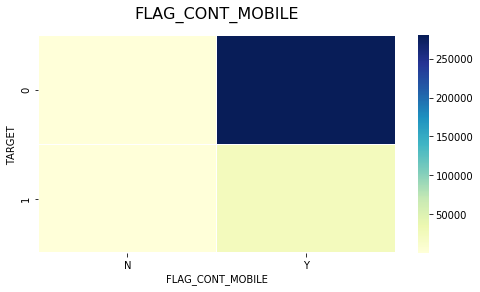

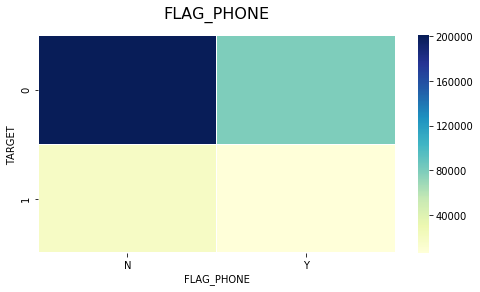

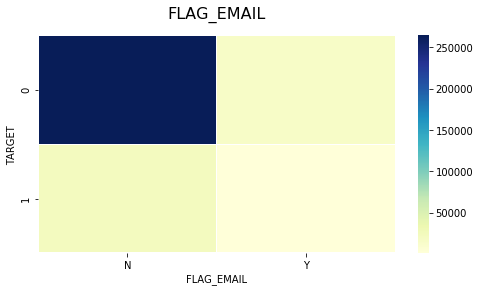

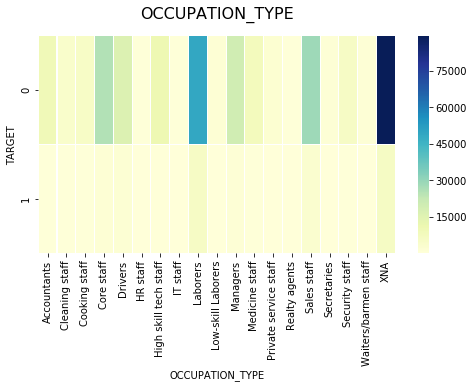

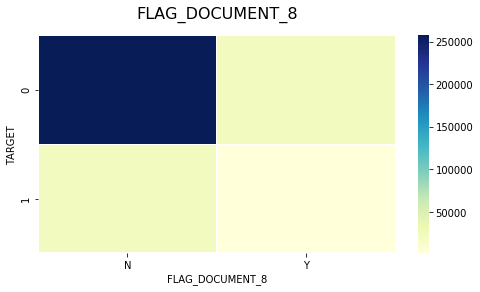

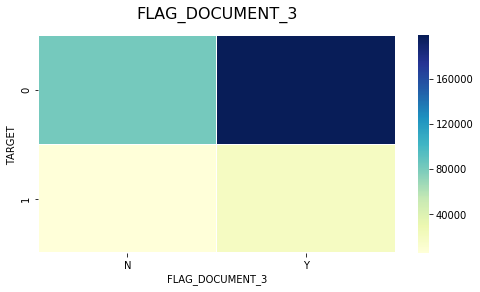

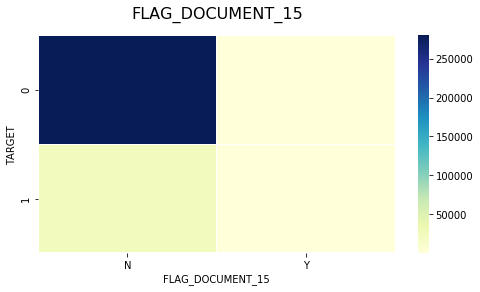

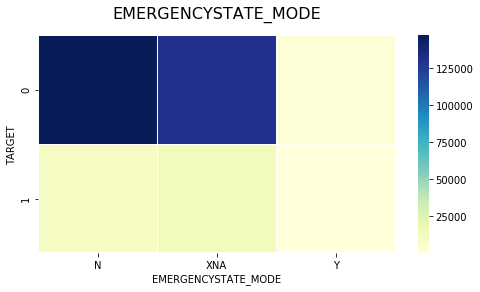

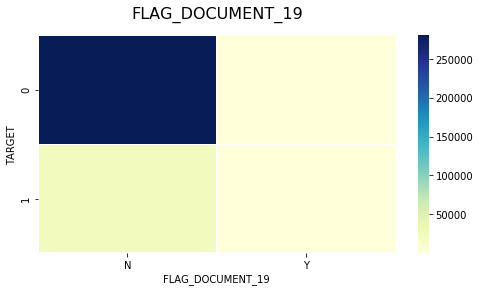

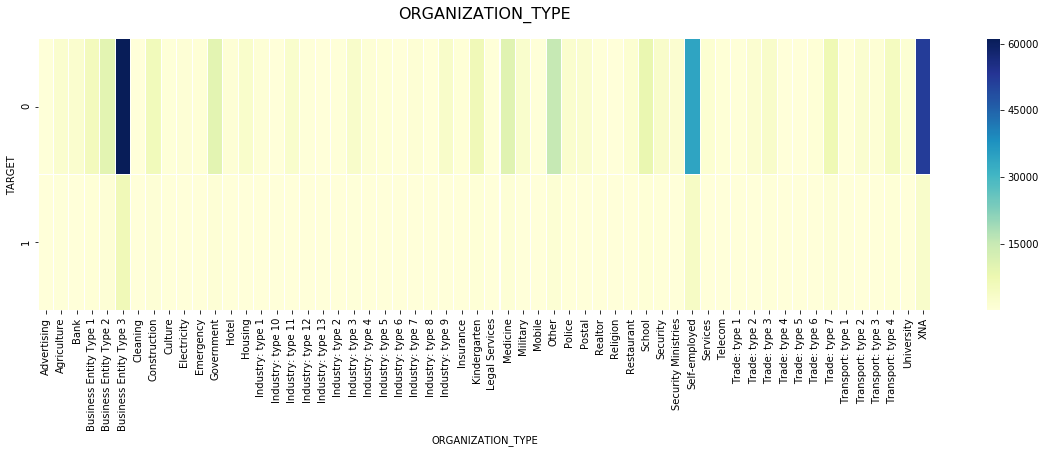

In [133]:
for key, value in cross.items():
    
    #sns.heatmap(c, cmap = sns.cubehelix_palette(8))
    #print(key)
    #print(value)
    #print(40 * '-')
    
    fsize=(8,4)
    if key == "ORGANIZATION_TYPE":
        fsize=(20,5)

    # Define the plot
    fig, ax = plt.subplots(figsize=fsize)
    
    
    #fig, ax = plt.subplots()

    # Add title to the Head Map
    title = key

    # Set the font size and the distance of the title from the plot
    plt.title(title, fontsize=16)
    ttl = ax.title
    ttl.set_position([0.5, 1.05])

    # Hide ticks for X & Y axis
    ax.set_xticks([])
    ax.set_yticks([])

    # Remove the axes
    #ax.axis('off')

    sns.heatmap(value, annot=False, fmt='d', cmap="YlGnBu", linewidths=0.03, ax=ax, )
    #cmap='viridis'
    #cmap='RdYlGn'
    #cmap='YlGnBu'
    #robust=True
    
    plt.show()


# Categorias vs Numéricas

In [66]:
categoricas

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_15', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_19',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [67]:
nao_categoricas

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'DEF_30_CNT_SOCIAL_CIRCLE', 'LIVINGAREA_MEDI',
       'REGION_RATING_CLIENT_W_CITY', 'FLOORSMIN_AVG'],
      dtype='object')

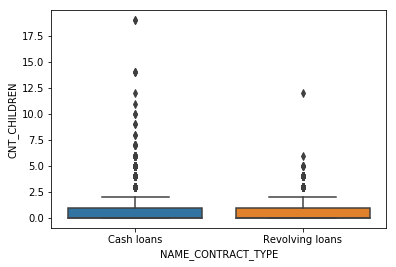

In [68]:
sns.boxplot(data = df, x = 'NAME_CONTRACT_TYPE', y = 'CNT_CHILDREN')

for x in categoricas:
    for y in nao_categoricas[2:]:
        
        with plt.style.context(plot_style):
            plt.figure()
            plt.title(x, fontsize = 18)

            fsize = (9.0, 6.0)
            fsize = (14.0, 7.0)

            sns.boxplot(data = df, x = x, y = y)
            #df[x].value_counts().sort_index().plot(kind = 'box', figsize = fsize)
            plt.show()   

# Preparando os dados para Machine Learn

In [69]:
mlBkp = df.copy(deep=True)

In [70]:
# Fazer o FIT dos dados

le = LabelEncoder()

In [71]:
# Vou transformar a base toda, só vou deixar os campos indice e Target de fora
for x in df.columns[2:]:
    df[x] = le.fit_transform(df[x])

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305186 entries, 0 to 307510
Data columns (total 40 columns):
SK_ID_CURR                     305186 non-null int64
TARGET                         305186 non-null int64
NAME_CONTRACT_TYPE             305186 non-null int64
CODE_GENDER                    305186 non-null int64
FLAG_OWN_CAR                   305186 non-null int64
FLAG_OWN_REALTY                305186 non-null int64
CNT_CHILDREN                   305186 non-null int64
AMT_INCOME_TOTAL               305186 non-null int64
AMT_CREDIT                     305186 non-null int64
AMT_ANNUITY                    305186 non-null int64
AMT_GOODS_PRICE                305186 non-null int64
NAME_TYPE_SUITE                305186 non-null int64
NAME_INCOME_TYPE               305186 non-null int64
NAME_EDUCATION_TYPE            305186 non-null int64
NAME_FAMILY_STATUS             305186 non-null int64
NAME_HOUSING_TYPE              305186 non-null int64
REGION_POPULATION_RELATIVE     305186 non

In [73]:
# Dividindo entre Alvo e Dados

X = df.drop(['SK_ID_CURR', 'TARGET'], axis = 1)
Y = df['TARGET']

## Dividindo as amostras

In [74]:
# ->  from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.33, random_state=42)

In [75]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(204474, 38)
(100712, 38)
(204474,)
(100712,)


## Preparando Machine Learn

In [76]:
# Criando o Classificador - RandomForest
rf = RandomForestClassifier()

In [77]:
rf.fit(Xtrain, Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# RESULTADO!

In [78]:
accuracy_score(Ytest, rf.predict(Xtest))

0.9172293271904043

# Agregando dados - Merge

In [79]:
df2 = pd.read_csv('./data/previous_application.csv', index_col=0)

/home/jrperin/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [80]:
df2.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,,,,,,,,,,,,,,,,,,,,,
2030495,271877,Consumer loans,1.730k,17.145k,17.145k,0.000,17.145k,SATURDAY,15,Y,...,Connectivity,12.000,middle,POS mobile with interest,365.243k,-42.000,300.000,-42.000,-37.000,0.000
2802425,108129,Cash loans,25.189k,607.500k,679.671k,NaN,607.500k,THURSDAY,11,Y,...,XNA,36.000,low_action,Cash X-Sell: low,365.243k,-134.000,916.000,365.243k,365.243k,1.000
2523466,122040,Cash loans,15.061k,112.500k,136.444k,NaN,112.500k,TUESDAY,11,Y,...,XNA,12.000,high,Cash X-Sell: high,365.243k,-271.000,59.000,365.243k,365.243k,1.000
2819243,176158,Cash loans,47.041k,450.000k,470.790k,NaN,450.000k,MONDAY,7,Y,...,XNA,12.000,middle,Cash X-Sell: middle,365.243k,-482.000,-152.000,-182.000,-177.000,1.000
1784265,202054,Cash loans,31.924k,337.500k,404.055k,NaN,337.500k,THURSDAY,9,Y,...,XNA,24.000,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df1 = mlBkp.copy(deep=True)

In [82]:
df1.set_index('SK_ID_CURR')

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_8,FLAG_DOCUMENT_3,FLAG_DOCUMENT_15,LIVINGAREA_MEDI,EMERGENCYSTATE_MODE,REGION_RATING_CLIENT_W_CITY,FLOORSMIN_AVG,FLAG_DOCUMENT_19,ORGANIZATION_TYPE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202.500k,406.598k,24.700k,351.000k,...,2.000,N,Y,N,19.300m,N,2,19.300m,N,Business Entity Type 3
100003,0,Cash loans,F,N,N,0,270.000k,1.294M,35.698k,1.130M,...,0.000,N,Y,N,55.800m,N,1,55.800m,N,School
100004,0,Revolving loans,M,Y,Y,0,67.500k,135.000k,6.750k,135.000k,...,0.000,N,N,N,-1.000,XNA,2,-1.000,N,Government
100006,0,Cash loans,F,N,Y,0,135.000k,312.682k,29.686k,297.000k,...,0.000,N,Y,N,-1.000,XNA,2,-1.000,N,Business Entity Type 3
100007,0,Cash loans,M,N,Y,0,121.500k,513.000k,21.866k,513.000k,...,0.000,Y,N,N,-1.000,XNA,2,-1.000,N,Religion
100008,0,Cash loans,M,N,Y,0,99.000k,490.496k,27.518k,454.500k,...,0.000,N,Y,N,-1.000,XNA,2,-1.000,N,Other
100009,0,Cash loans,F,Y,Y,1,171.000k,1.561M,41.301k,1.395M,...,0.000,Y,N,N,-1.000,XNA,2,-1.000,N,Business Entity Type 3
100010,0,Cash loans,M,Y,Y,0,360.000k,1.530M,42.075k,1.530M,...,0.000,N,Y,N,-1.000,XNA,3,-1.000,N,Other
100011,0,Cash loans,F,N,Y,0,112.500k,1.020M,33.826k,913.500k,...,0.000,N,Y,N,-1.000,XNA,2,-1.000,N,XNA


In [83]:
df3 = pd.merge(df1, df2, how = 'inner')

In [84]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 0 to 406
Data columns (total 70 columns):
SK_ID_CURR                     407 non-null int64
TARGET                         407 non-null int64
NAME_CONTRACT_TYPE             407 non-null object
CODE_GENDER                    407 non-null object
FLAG_OWN_CAR                   407 non-null object
FLAG_OWN_REALTY                407 non-null object
CNT_CHILDREN                   407 non-null int64
AMT_INCOME_TOTAL               407 non-null float64
AMT_CREDIT                     407 non-null float64
AMT_ANNUITY                    407 non-null float64
AMT_GOODS_PRICE                407 non-null float64
NAME_TYPE_SUITE                407 non-null object
NAME_INCOME_TYPE               407 non-null object
NAME_EDUCATION_TYPE            407 non-null object
NAME_FAMILY_STATUS             407 non-null object
NAME_HOUSING_TYPE              407 non-null object
REGION_POPULATION_RELATIVE     407 non-null float64
DAYS_BIRTH                

In [85]:
df3.loc[:'SK_ID_CURR', 'ORGANIZATION_TYPE' : 'NFLAG_INSURED_ON_APPROVAL' ].sample(20)

,ORGANIZATION_TYPE,AMT_APPLICATION,AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
249,Bank,180.000k,NaN,MONDAY,9,Y,1,NaN,NaN,NaN,...,XNA,0.000,XNA,Card X-Sell,365.243k,365.243k,365.243k,365.243k,-72.000,0.000
183,Police,900.000k,NaN,SUNDAY,15,Y,1,NaN,NaN,NaN,...,XNA,0.000,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN
209,Business Entity Type 3,450.000k,NaN,TUESDAY,20,Y,1,NaN,NaN,NaN,...,XNA,0.000,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN
200,Business Entity Type 3,900.000k,NaN,WEDNESDAY,16,N,1,NaN,NaN,NaN,...,XNA,0.000,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN
336,XNA,202.500k,NaN,SUNDAY,7,N,1,NaN,NaN,NaN,...,XNA,0.000,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN
151,Business Entity Type 3,270.000k,NaN,THURSDAY,15,Y,1,NaN,NaN,NaN,...,XNA,0.000,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN
283,Business Entity Type 3,315.000k,NaN,FRIDAY,16,Y,1,NaN,NaN,NaN,...,XNA,0.000,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN
135,Business Entity Type 2,900.000k,NaN,THURSDAY,13,N,1,NaN,NaN,NaN,...,XNA,0.000,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN
276,Trade: type 2,225.000k,NaN,WEDNESDAY,14,Y,1,NaN,NaN,NaN,...,Consumer electronics,48.000,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
165,Police,180.000k,NaN,WEDNESDAY,12,Y,1,NaN,NaN,NaN,...,XNA,0.000,XNA,Card X-Sell,365.243k,365.243k,365.243k,365.243k,-49.000,0.000
